<a href="https://colab.research.google.com/github/ezaaputra/model-klasifikasi-gambar/blob/main/model_klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama: Eza Ananda Putra

> Email: eza.a.putra@gmail.com

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-05 15:29:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.53MB/s    in 44s     

2020-11-05 15:30:04 (7.06 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

In [ ]:
# Callback untuk mencegah overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 3060.10 files/s]


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',)
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose = 2,
    callbacks=[callbacks]
)

Epoch 1/20
41/41 - 77s - loss: 1.3133 - accuracy: 0.4428 - val_loss: 0.9181 - val_accuracy: 0.5463
Epoch 2/20
41/41 - 76s - loss: 0.6575 - accuracy: 0.7287 - val_loss: 0.8058 - val_accuracy: 0.6597
Epoch 3/20
41/41 - 76s - loss: 0.3788 - accuracy: 0.8620 - val_loss: 0.3260 - val_accuracy: 0.8877
Epoch 4/20
41/41 - 76s - loss: 0.3401 - accuracy: 0.8864 - val_loss: 0.5707 - val_accuracy: 0.7905
Epoch 5/20
41/41 - 76s - loss: 0.2272 - accuracy: 0.9238 - val_loss: 0.1961 - val_accuracy: 0.9340
Epoch 6/20
41/41 - 80s - loss: 0.1775 - accuracy: 0.9405 - val_loss: 0.2036 - val_accuracy: 0.9433
Epoch 7/20
41/41 - 76s - loss: 0.1791 - accuracy: 0.9444 - val_loss: 0.1729 - val_accuracy: 0.9468
Epoch 8/20
41/41 - 76s - loss: 0.1374 - accuracy: 0.9581 - val_loss: 0.1524 - val_accuracy: 0.9595
Epoch 9/20
41/41 - 76s - loss: 0.1068 - accuracy: 0.9634 - val_loss: 0.1611 - val_accuracy: 0.9491
Epoch 10/20
41/41 - 76s - loss: 0.1718 - accuracy: 0.9497 - val_loss: 0.1427 - val_accuracy: 0.9595
Epoch 11/

Saving gunting2.png to gunting2.png
gunting2.png
scissors


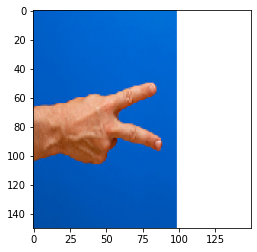

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else:
      print('scissors')

In [ ]:
# !rm -rf '/tmp/rockpaperscissors/'
# !rm -rf '/tmp/__MACOSX/'
# !rm -rf '/content/output/'